# Dagster Bitcoin API

This notebook demonstrates how to interact with the CoinGecko API using Dagster. It provides practical examples of retrieving cryptocurrency data, calculating financial metrics, and detecting anomalies for enhanced crypto analysis.

## Notebook Objectives
It focuses on showcasing the utility functions used to:
- Fetch Bitcoin prices from the CoinGecko API
- Transform the data into a structured format
- Persist the data to disk

# References

- CoinGecko API Docs: https://www.coingecko.com/en/api
- Dagster Documentation: https://docs.dagster.io
- Getting started with Dagster: https://docs.dagster.io/getting-started

# Citations
CoinGecko. (2024). CoinGecko API v3. Retrieved from https://www.coingecko.com/en/api/documentation

## Setup and Imports

This section sets up the notebook environment and imports core utility functions needed for interacting with the CoinGecko API via Dagster.

In [22]:
from Dagster_utils import (
    fetch_bitcoin_price,
    process_price_data,
    save_to_csv,
    get_historical_bitcoin_data,
    calculate_moving_average,
    detect_trend,
    detect_anomalies_zscore,
    plot_price_with_moving_average,
    fit_arima_model,
    plot_arima_forecast
)

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Fetch Current Price

In [23]:
# Fetch current price from CoinGecko API
live_price = fetch_bitcoin_price()
print("Live Price Data:", live_price)

Live Price Data: {'timestamp': datetime.datetime(2025, 5, 17, 3, 22, 32, 953530), 'price': 103482}


## Format Price into DataFrame

In [24]:
# Convert price dict into DataFrame
df_price = process_price_data(live_price)
df_price

,timestamp,price
0,2025-05-17 03:22:32.953530,103482


### Save file to CSV

In [25]:
save_to_csv(df_price, filepath="bitcoin_prices.csv")
print("Saved to 'bitcoin_prices.csv'")

Saved to 'bitcoin_prices.csv'


##  Fetch Historical Data

In [26]:
# Get last 30 days of historical BTC prices
df_hist = get_historical_bitcoin_data(days=365)
df_hist.head()

,date,price
0,2024-05-18,67053.123265
1,2024-05-19,66912.618614
2,2024-05-20,66252.712596
3,2024-05-21,71430.297002
4,2024-05-22,70189.835818


## Calculate Moving Average

In [27]:
# Compute 5-day moving average on historical data
df_ma = calculate_moving_average(df_hist, window_days=5)
df_ma.head()

,date,price,moving_average
0,2024-05-18,67053.123265,67053.123265
1,2024-05-19,66912.618614,66982.870940
2,2024-05-20,66252.712596,66739.484825
3,2024-05-21,71430.297002,67912.187869
4,2024-05-22,70189.835818,68367.717459


## Trends and Anomoli Detection

In [28]:
# Analyze basic trend using linear regression slope
trend_result = detect_trend(df_ma)
print("Trend:", trend_result)

# Identify outliers in price movement
df_anom = detect_anomalies_zscore(df_ma)
df_anom[df_anom["anomaly"] == True].head()

Trend: upward


,date,price,moving_average,z_score,anomaly


## Visualizations

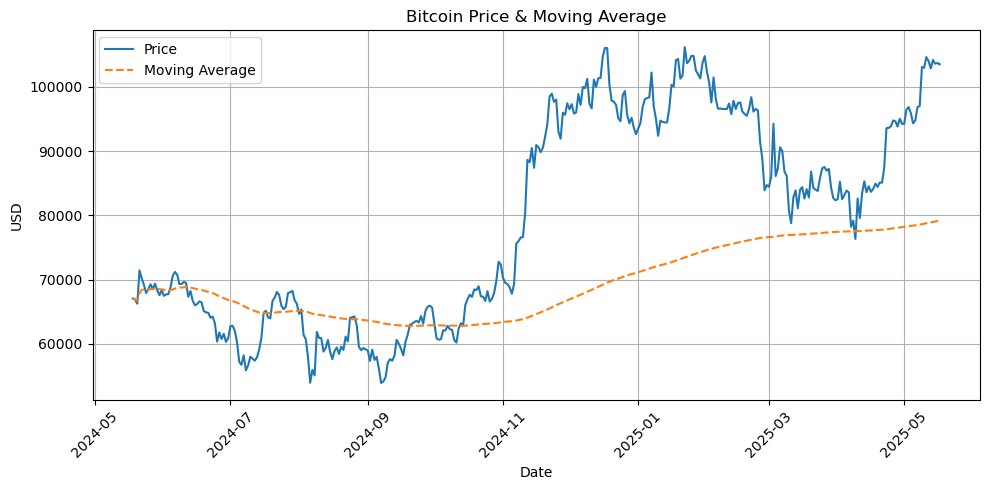

In [29]:
# Visualize price + moving average line
plot_price_with_moving_average(df_anom)